In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
from scipy.stats import sem, linregress

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')


In [29]:
# Water File to Load
H2ODataFile = "../1_Input/DF_Interim/water_perCountry.csv"

# Load to dataframe
H2O_data = pd.read_csv(H2ODataFile)

H2O_data.head()


Country    % Access  \
0     Afghanistan   36.228000   
1         Albania   95.750002   
2         Algeria   88.376923   
3  American Samoa   97.984726   
4         Andorra  100.000000   

   Total water withdrawal per capita (m³ per person per year)  
0                                        1355.433333           
1                                         464.733333           
2                                         161.857143           
3                                                NaN           
4                                                NaN

In [30]:
# Violence File to Load
ViolenceDataFile = "../1_Input/DF_Interim/violence_perCountry.csv"

# Load to dataframe
violence_data = pd.read_csv(ViolenceDataFile)

violence_data.head()


Country  Conflict Count  Conflict Deaths  Homocide Count  Homocide Rate
0  Afghanistan          2425.0          18714.0           712.0            2.4
1      Albania             NaN              NaN          1542.0           49.9
2      Algeria           248.0           1178.0           516.0            1.5
3      Andorra             NaN              NaN             1.0            1.3
4       Angola           129.0           2154.0          3426.0           19.0

In [31]:
# Merge tables
water_vs_violence = pd.merge(H2O_data, violence_data, how="outer", on="Country")


wv_df = water_vs_violence.dropna()

wv_df.head()


Country   % Access  \
0   Afghanistan  36.228000   
2       Algeria  88.376923   
5        Angola  46.453846   
8       Armenia  94.862499   
12   Azerbaijan  76.661539   

    Total water withdrawal per capita (m³ per person per year)  \
0                                         1355.433333            
2                                          161.857143            
5                                           41.073333            
8                                          905.800000            
12                                        1366.750000            

    Conflict Count  Conflict Deaths  Homocide Count  Homocide Rate  
0           2425.0          18714.0           712.0            2.4  
2            248.0           1178.0           516.0            1.5  
5            129.0           2154.0          3426.0           19.0  
8              8.0             16.0           116.0            3.6  
12            43.0            137.0           206.0            2.2

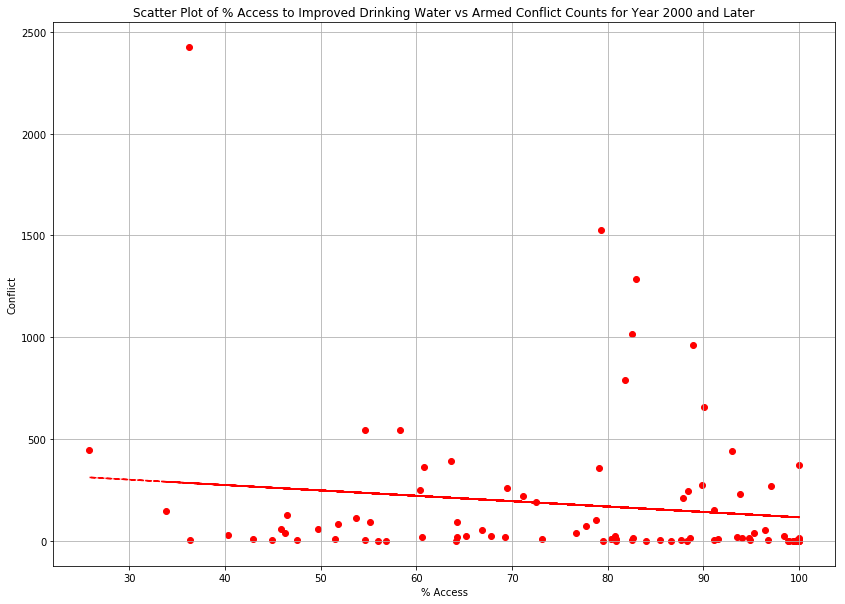

In [38]:
plt.scatter(wv_df["% Access"], wv_df["Conflict Count"], color='r')
plt.title('Scatter Plot of % Access to Improved Drinking Water vs Armed Conflict Counts for Year 2000 and Later')
plt.xlabel("% Access")
plt.ylabel("Conflict")

z = np.polyfit(wv_df["% Access"], wv_df["Conflict Count"], 1)
p = np.poly1d(z)
plt.plot(wv_df["% Access"],p(wv_df["% Access"]),"r--")

plt.grid()

plt.gcf().set_size_inches(14, 10)

# Save the Figure
# plt.savefig("output/Survival During Treatment.png")

# Show the Figure
plt.show()

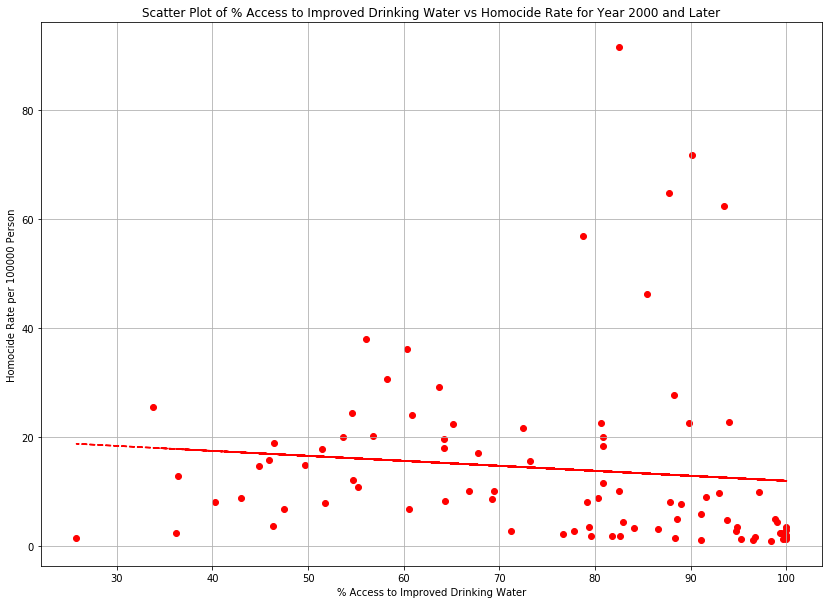

In [41]:

plt.scatter(wv_df["% Access"], wv_df["Homocide Rate"], color='r')
plt.title('Scatter Plot of % Access to Improved Drinking Water vs Homocide Rate for Year 2000 and Later')
plt.xlabel("% Access to Improved Drinking Water")
plt.ylabel("Homocide Rate per 100000 Person")

plt.grid()

z = np.polyfit(wv_df["% Access"], wv_df["Homocide Rate"], 1)
p = np.poly1d(z)
plt.plot(wv_df["% Access"],p(wv_df["% Access"]),"r--")

plt.gcf().set_size_inches(14, 10)

# Save the Figure
# plt.savefig("output/Survival During Treatment.png")

# Show the Figure
plt.show()

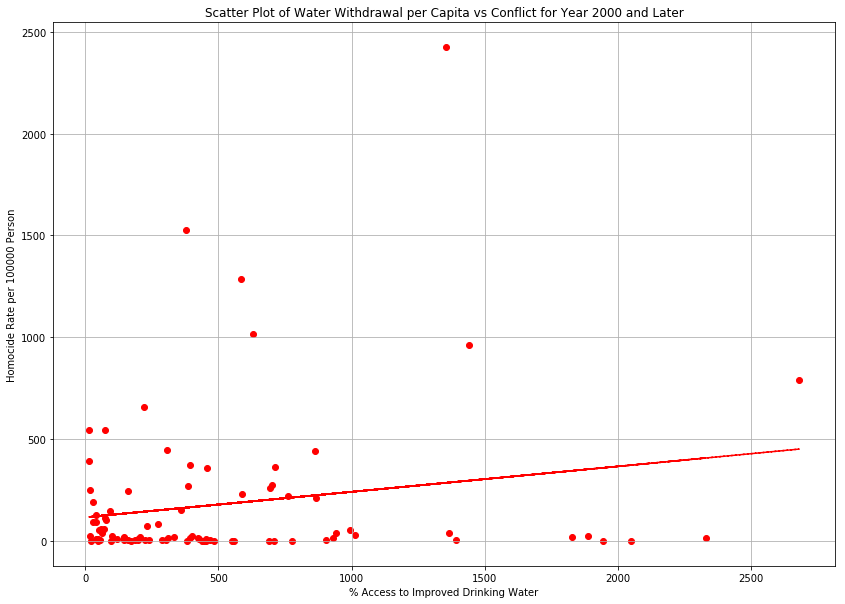

In [39]:
plt.scatter(wv_df["Total water withdrawal per capita (m³ per person per year)"], wv_df["Conflict Count"], color='r')
plt.title('Scatter Plot of Water Withdrawal per Capita vs Conflict for Year 2000 and Later')
plt.xlabel("% Access to Improved Drinking Water")
plt.ylabel("Homocide Rate per 100000 Person")


z = np.polyfit(wv_df["Total water withdrawal per capita (m³ per person per year)"], wv_df["Conflict Count"], 1)
p = np.poly1d(z)
plt.plot(wv_df["Total water withdrawal per capita (m³ per person per year)"],p(wv_df["Total water withdrawal per capita (m³ per person per year)"]),"r--")

plt.grid()

plt.gcf().set_size_inches(14, 10)

# Save the Figure
# plt.savefig("output/Survival During Treatment.png")

# Show the Figure
plt.show()

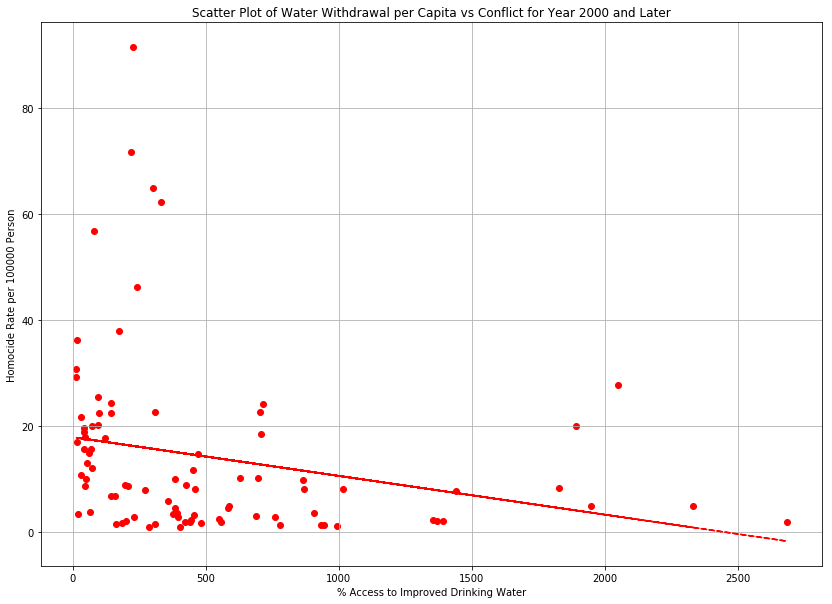

In [40]:
plt.scatter(wv_df["Total water withdrawal per capita (m³ per person per year)"], wv_df["Homocide Rate"], color='r')
plt.title('Scatter Plot of Water Withdrawal per Capita vs Conflict for Year 2000 and Later')
plt.xlabel("% Access to Improved Drinking Water")
plt.ylabel("Homocide Rate per 100000 Person")

z = np.polyfit(wv_df["Total water withdrawal per capita (m³ per person per year)"], wv_df["Homocide Rate"], 1)
p = np.poly1d(z)
plt.plot(wv_df["Total water withdrawal per capita (m³ per person per year)"],p(wv_df["Total water withdrawal per capita (m³ per person per year)"]),"r--")

plt.grid()

plt.gcf().set_size_inches(14, 10)

# Save the Figure
# plt.savefig("output/Survival During Treatment.png")

# Show the Figure
plt.show()